In [76]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

DATA_FOLDER = Path("../data/cleaned")   # folder where your CSVs are
TOPIC_COL   = "label"        # name of label column in your CSVs
output_folder = Path("../results/outlet_plots")
output_folder.mkdir(exist_ok=True)
output_csv = Path("../results")

dfs = []

for csv_path in DATA_FOLDER.glob("*.csv"):
    outlet_name = csv_path.stem          # e.g. "AP" from "AP.csv"
    df = pd.read_csv(csv_path)

    if TOPIC_COL not in df.columns:
        print(f"'{TOPIC_COL}' not found in {csv_path.name}")
    
    df["outlet"] = outlet_name                    # add outlet name

    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

# Rename the outlets from filename to media outlet name
rename_map = {
    "zelensky_ap_filtered": "Associated Press",
    "zelensky_cbc_filtered": "CBC News",
    "zelensky_ctv_filtered": "CTV News",
    "zelensky_foxnews_filtered": "Fox News",
    "zelensky_globalnews_filtered": "Global News",
    "zelensky_nbc_filtered": "NBC News",
    "zelensky_npr_filtered": "NPR",
    "zelensky_nytimes_filtered": "NY Times",
    "zelensky_wsj_filtered": "The Wall Street Journal News",
    "zelensky_wsjopinions_filtered": "The Wall Street Journal Opinions"
}

data["outlet"] = data["outlet"].replace(rename_map)

In [85]:
topic_outlet_counts = pd.crosstab(
    data["label"],     # rows
    data["outlet"]     # columns
)
topic_outlet_counts["Total"] = topic_outlet_counts.sum(axis=1)

topic_outlet_counts

outlet,Associated Press,CBC News,CTV News,Fox News,Global News,NBC News,NPR,NY Times,The Wall Street Journal News,The Wall Street Journal Opinions,Total
label,,,,,,,,,,,
Aid Policies,11,3,3,1,6,10,25,30,7,0,96
Diplomatic Engagements,65,6,11,26,10,16,55,51,4,0,244
Domestic Governance,5,1,2,6,7,0,8,12,4,0,45
Economic Structure,1,0,0,0,0,1,1,1,2,0,6
Humanitarian Crisis,3,0,0,0,0,3,4,4,0,0,14
Media Representation,13,6,8,7,10,8,17,28,10,1,108
Military Operations,8,9,1,3,3,1,4,17,2,0,48
Russia-Related Rhetoric,16,12,3,12,11,14,12,51,5,0,136


In [92]:
topic_outlet_counts.to_csv(output_csv/f"article_counts_per_outlet.csv", index=False)

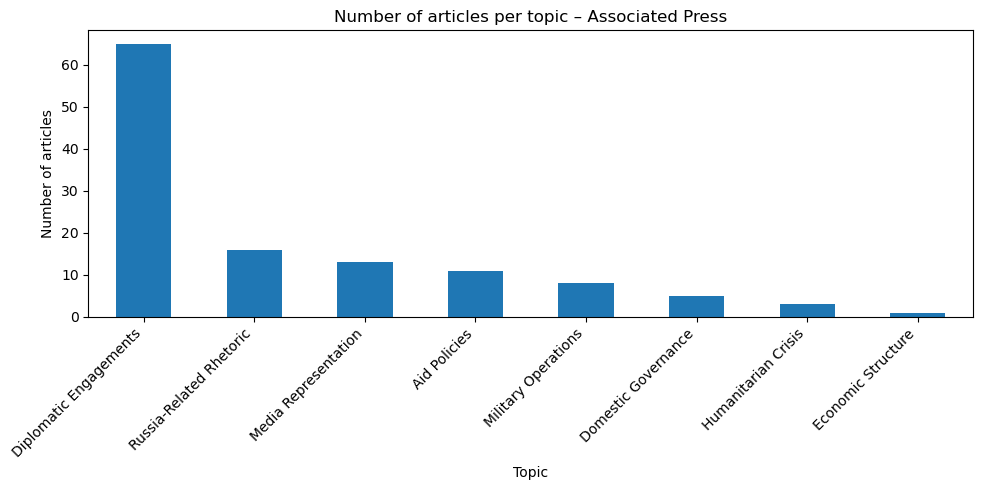

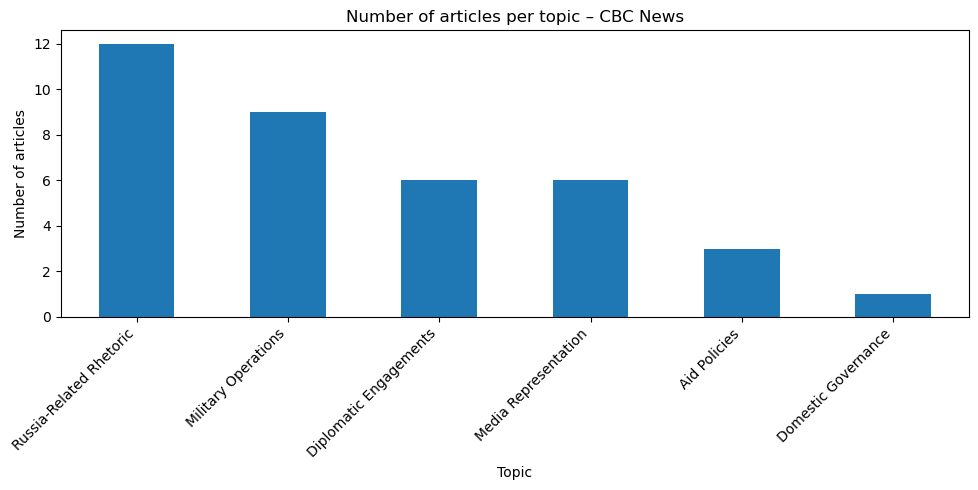

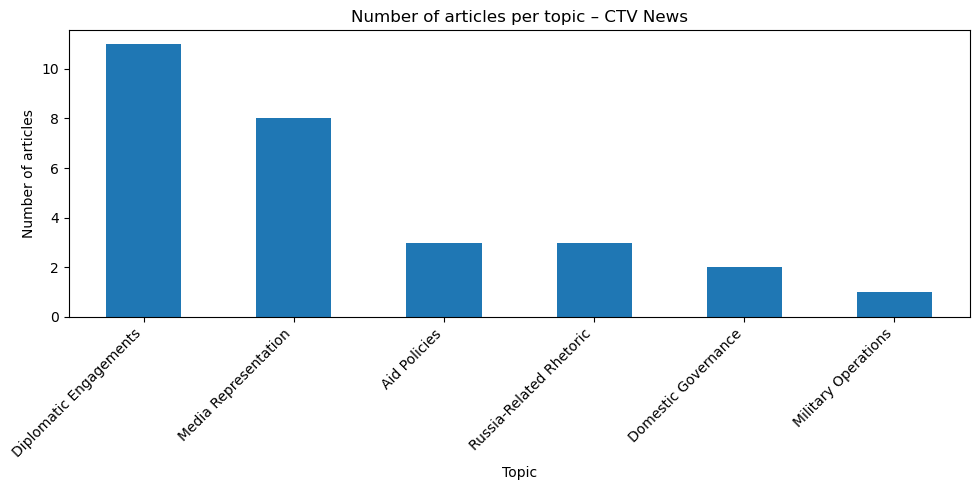

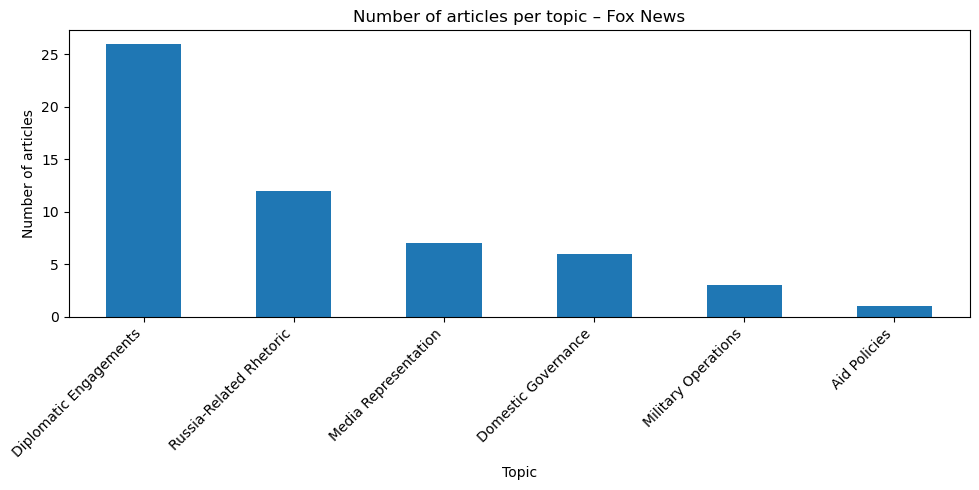

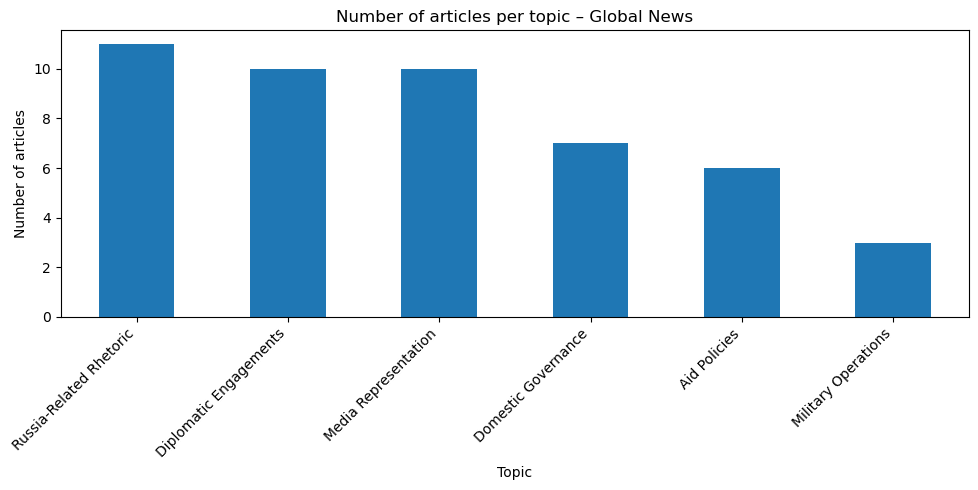

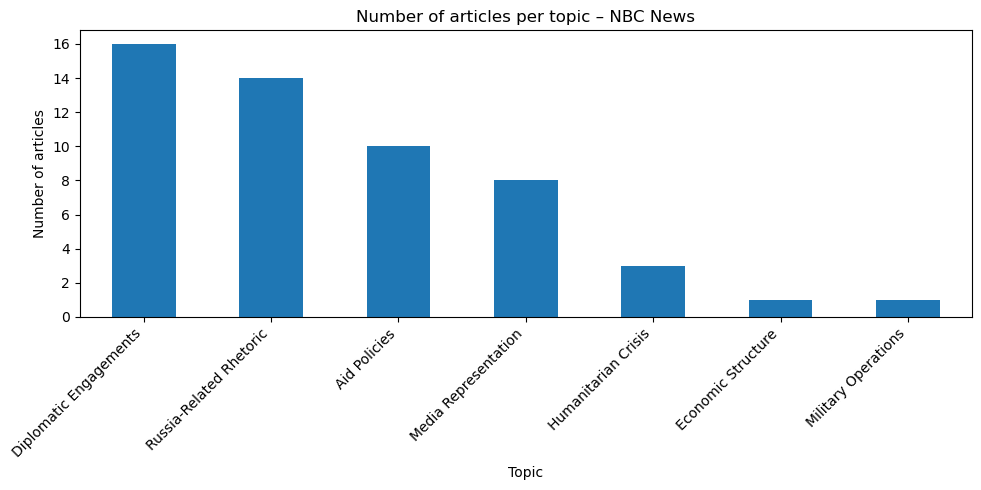

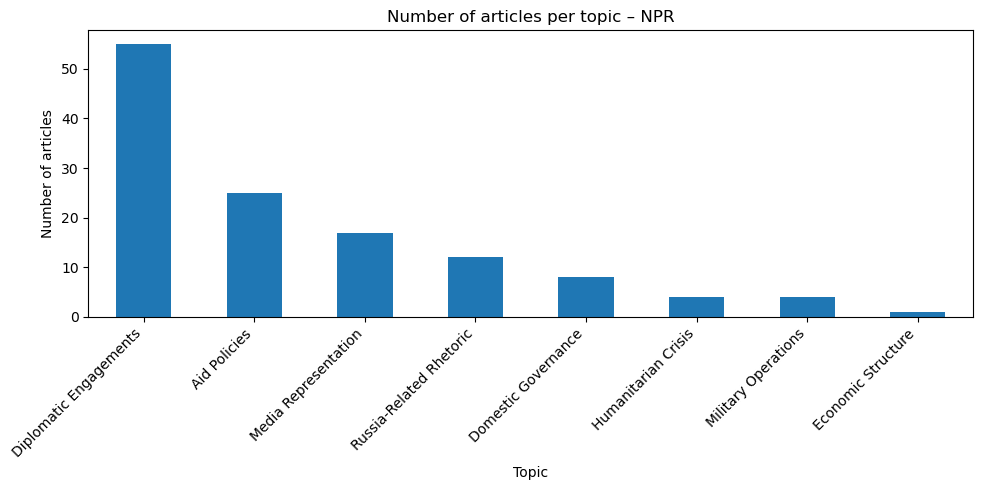

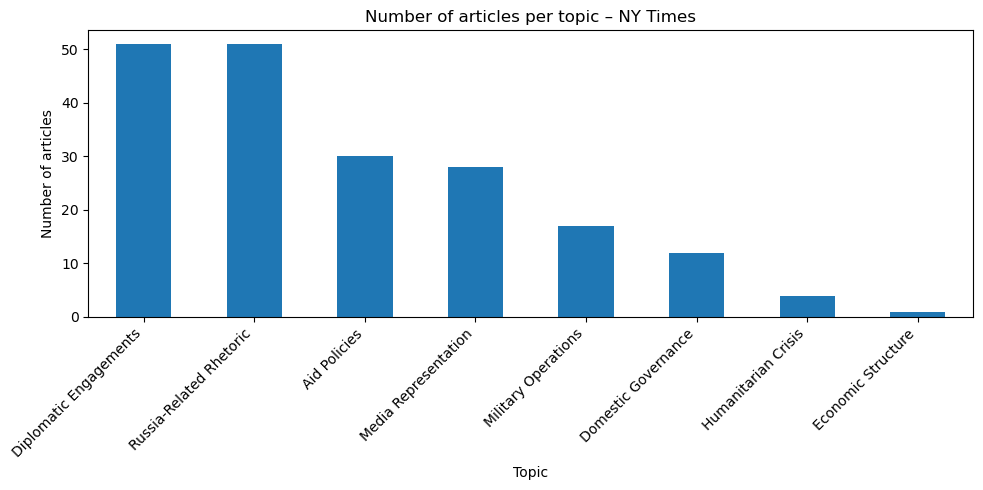

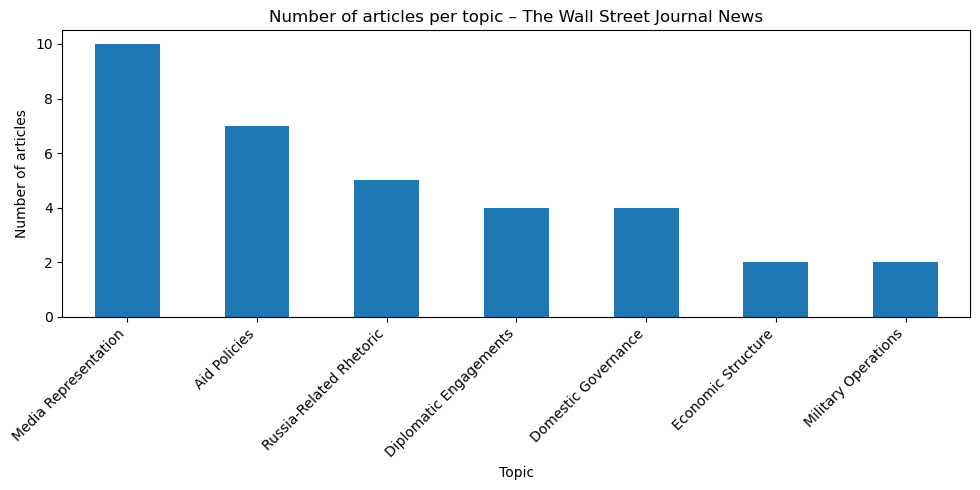

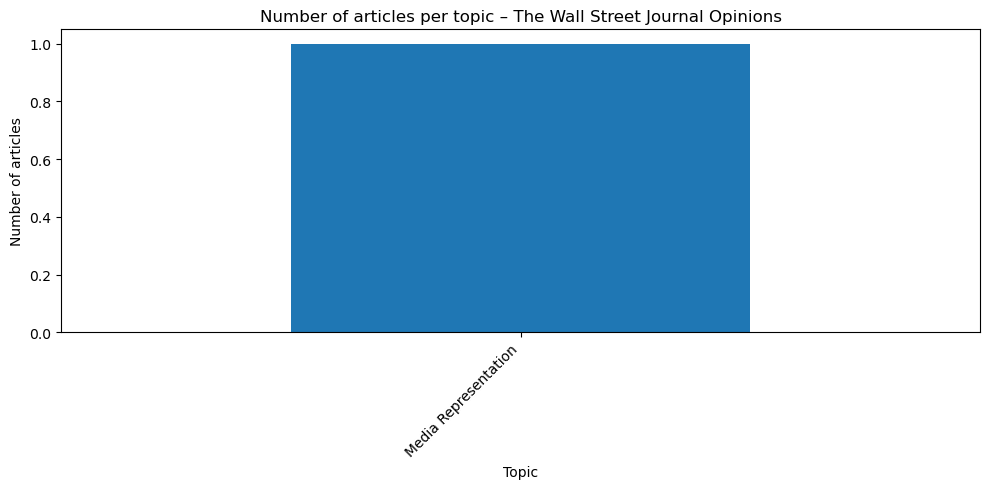

In [94]:
for outlet, df_outlet in data.groupby("outlet"):
    # Count articles per topic for this outlet
    counts = (
        df_outlet
        .groupby(["label", "outlet"])
        .size()
        .reset_index(name="count")
        .sort_values("count", ascending=False)
    )

    # Plot
    ax = counts.plot(
        kind="bar",
        x=TOPIC_COL,
        y="count",
        legend=False,
        figsize=(10, 5),
        title=f"Number of articles per topic – {outlet}"
    )

    ax.set_xlabel("Topic")
    ax.set_ylabel("Number of articles")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Save plot in folder as a png
    fig = ax.get_figure()
    fig.savefig(output_folder / f"{outlet}_topic_counts.png",
                dpi=300, bbox_inches="tight")

    plt.show()